# Precision

Measures the proportion of positive predictions that are correct. It's calculated by dividing the number of true positives by the total number of true positives and false positives. Precision is important because it shows how well a model can identify relevant data points.

# Recall
Measures the proportion of positive instances in a dataset that are correctly identified. It's calculated by dividing the number of true positives by the total number of true positives and false negatives. Recall is important because it shows how well a model can find all relevant cases in a dataset.

#F1 score

Combines precision and recall into a single metric that's often used to assess a model's strength. It's calculated as the harmonic mean of precision and recall.

Precision and recall are often discussed in terms of balance between accuracy and completeness, as improving one metric can sometimes reduce the other.

For example, a model that overpredicts images as not animals might have 100% precision because it doesn't produce any false positives, but its recall might be impaired by false negatives

Convolutional Neural Networks (CNNs) are a powerful tool for machine learning, especially in tasks related to computer vision. Convolutional Neural Networks, or CNNs, are a specialized class of neural networks designed to effectively process grid-like data, such as images.


# What is Convolutional Neural Network(CNN)?
A Convolutional Neural Network (CNN) is a type of deep learning algorithm that is particularly well-suited for image recognition and processing tasks. It is made up of multiple layers, including convolutional layers, pooling layers, and fully connected layers. The architecture of CNNs is inspired by the visual processing in the human brain, and they are well-suited for capturing hierarchical patterns and spatial dependencies within images.

# Key components of a Convolutional Neural Network include:

### Convolutional Layers:

These layers apply convolutional operations to input images, using filters (also known as kernels) to detect features such as edges, textures, and more complex patterns. Convolutional operations help preserve the spatial relationships between pixels.

### Pooling Layers:

Pooling layers downsample the spatial dimensions of the input, reducing the computational complexity and the number of parameters in the network. Max pooling is a common pooling operation, selecting the maximum value from a group of neighboring pixels.

### Activation Functions:

Non-linear activation functions, such as Rectified Linear Unit (ReLU), introduce non-linearity to the model, allowing it to learn more complex relationships in the data.


### Fully Connected Layers:
These layers are responsible for making predictions based on the high-level features learned by the previous layers. They connect every neuron in one layer to every neuron in the next layer.

CNNs are trained using a large dataset of labeled images, where the network learns to recognize patterns and features that are associated with specific objects or classes.

Proven to be highly effective in image-related tasks, achieving state-of-the-art performance in various computer vision applications.

 Their ability to automatically learn hierarchical representations of features makes them well-suited for tasks where the spatial relationships and patterns in the data are crucial for accurate predictions.

 CNNs are widely used in areas such as image classification, object detection, facial recognition, and medical image analysis.

In [ ]:
!pip install torch torchvision numpy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu



### 1. **Importing Required Libraries**
   - `torch`: Core PyTorch library for tensor operations.
   - `torch.nn`: Defines modules for building neural networks.
   - `torch.optim`: Provides optimization algorithms like Adam.
   - `torch.nn.functional`: Includes functions like ReLU, cross-entropy loss, etc.
   - `torchvision.datasets`: Provides access to datasets like MNIST.
   - `torchvision.transforms`: Allows for preprocessing and transforming datasets.
   - `torch.utils.data.DataLoader`: Facilitates batch loading and shuffling of datasets.
   - `numpy`: Used for numerical operations.



```
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
```



### 2. **Defining the SimpleCNN Model**
   - A simple Convolutional Neural Network (CNN) is defined with:
     - **2 Convolutional Layers**: Extract features from input images.
     - **2 Fully Connected Layers**: Perform the final classification.
   - The forward method defines how data passes through the network.

```
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(12*12*64, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x
```

### 3. **Loading and Normalizing the MNIST Dataset**
   - **Transformations**:
     - Images are converted to tensors and normalized with a mean and standard deviation suited for MNIST.
   - **Dataset and DataLoader**:
     - `train_loader` and `test_loader` are created for batching the training and testing datasets, respectively.

```
# Load and normalize MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('../data', train=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)
```

### 4. **Initializing the Model, Loss Function, and Optimizer**
   - **Model Initialization**:
     - An instance of the `SimpleCNN` class is created.
   - **Optimizer**:
     - Adam optimizer is used to update the model parameters during training.
```
# Initialize model, loss function, and optimizer
model = SimpleCNN()
optimizer = optim.Adam(model.parameters())
```

### 5. **Training the Model**
   - **train Function**:
     - Runs through one epoch, processing batches of data, calculating loss, backpropagating errors, and updating model weights.
     - Logs the loss every 100 batches for monitoring.

```
# Train the model (for demonstration purposes)
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] Loss: {loss.item():.6f}')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Train for 1 epoch for demonstration
train(model, device, train_loader, optimizer, 1)
```

### 6. **Generating Adversarial Inputs**
   - **generate_adversarial_input Function**:
     - Creates adversarial examples by slightly perturbing the input images in the direction of the gradient of the loss with respect to the input.
     - **Perturbation**: A small value `epsilon` is added to the input to create the adversarial example.
     - The perturbed image is clamped to ensure pixel values stay within valid ranges.
```
def generate_adversarial_input(model, input_image, target_label, epsilon=0.1):
                input_image.requires_grad = True
                output = model(input_image)
                loss = nn.CrossEntropyLoss()(output, target_label)
                model.zero_grad()
                loss.backward()
                # Perturb the input image
                perturbed_image = input_image + epsilon * input_image.grad.sign()
                perturbed_image = torch.clamp(perturbed_image, 0, 1)  # Ensure the image remains in valid range
                return perturbed_image
```

### 7. **Maximizing Neuron Coverage**
   - **maximize_neuron_coverage Function**:
     - Iteratively perturbs the input image over multiple iterations to activate different neurons in the model.
     - This simulates the DeepXplore approach of maximizing coverage across the model.
     - Logs each iteration for debugging and insight into the process.


```
def maximize_neuron_coverage(model, input_image, iterations=10, epsilon=0.1):
    for i in range(iterations):
        print(f"Iteration {i+1}/{iterations}")
        output = model(input_image)
        perturbed_image = generate_adversarial_input(model, input_image, torch.argmax(output, dim=1))
        input_image = perturbed_image.detach()  # Detach to avoid accumulating gradients
    return input_image
```




### 8. **Testing the Model**
   - **test_models Function**:
     - Tests the model’s robustness by comparing its performance on original and perturbed data.
     - **Correct Predictions**: Counts the number of correct classifications on original and perturbed data.
     - **Discrepancies**: Counts the cases where the model’s prediction changes due to the perturbation.
     - Logs detailed batch-level information, including the number of discrepancies found.

```
def test_models(model, test_loader):
    discrepancies = 0
    total_samples = 0
    total_correct_original = 0
    total_correct_perturbed = 0

    for batch_idx, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        perturbed_data = maximize_neuron_coverage(model, data.clone())

        # Forward pass on original and perturbed data
        output_original = model(data)
        output_perturbed = model(perturbed_data)

        # Predictions
        pred_original = torch.argmax(output_original, dim=1)
        pred_perturbed = torch.argmax(output_perturbed, dim=1)

        # Count correct predictions
        correct_original = pred_original.eq(target).sum().item()
        correct_perturbed = pred_perturbed.eq(target).sum().item()

        # Discrepancies between original and perturbed predictions
        discrepancies_batch = pred_original.ne(pred_perturbed).sum().item()
        discrepancies += discrepancies_batch

        # Update totals
        total_samples += data.size(0)
        total_correct_original += correct_original
        total_correct_perturbed += correct_perturbed

        # Detailed logging
        print(f'Batch {batch_idx + 1}/{len(test_loader)}:')
        print(f'   Original Correct Predictions: {correct_original}/{data.size(0)}')
        print(f'   Perturbed Correct Predictions: {correct_perturbed}/{data.size(0)}')
        print(f'   Discrepancies in this batch: {discrepancies_batch}/{data.size(0)}\n')

    # Final summary
    accuracy_original = total_correct_original / total_samples * 100
    accuracy_perturbed = total_correct_perturbed / total_samples * 100

    print(f'Total samples tested: {total_samples}')
    print(f'Total correct predictions (original): {total_correct_original} ({accuracy_original:.2f}%)')
    print(f'Total correct predictions (perturbed): {total_correct_perturbed} ({accuracy_perturbed:.2f}%)')
    print(f'Total discrepancies found: {discrepancies} ({discrepancies / total_samples * 100:.2f}%)')

```


### 9. **Running the Test**
   - The `test_models` function is run to evaluate the model’s robustness against adversarial attacks.
   - After all batches are processed, a summary is printed showing:
     - Total number of samples tested.
     - Accuracy on original vs. perturbed data.
     - Total discrepancies found.

```
# Run the test
test_models(model, test_loader)
```


### 10. **Final Output**
   - The final output helps you understand how resilient the model is to adversarial attacks by providing detailed insights into where the model’s predictions fail when the inputs are slightly modified.

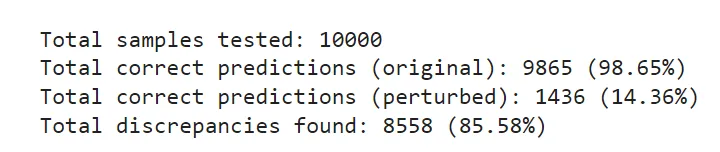

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(12*12*64, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

# Load and normalize MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('../data', train=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Initialize model, loss function, and optimizer
model = SimpleCNN()
optimizer = optim.Adam(model.parameters())

# Train the model (for demonstration purposes)
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] Loss: {loss.item():.6f}')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Train for 1 epoch for demonstration
train(model, device, train_loader, optimizer, 1)

def generate_adversarial_input(model, input_image, target_label, epsilon=0.1):
    input_image.requires_grad = True
    output = model(input_image)
    loss = nn.CrossEntropyLoss()(output, target_label)
    model.zero_grad()
    loss.backward()

    # Perturb the input image
    perturbed_image = input_image + epsilon * input_image.grad.sign()
    perturbed_image = torch.clamp(perturbed_image, 0, 1)  # Ensure the image remains in valid range

    return perturbed_image

def maximize_neuron_coverage(model, input_image, iterations=10, epsilon=0.1):
    for i in range(iterations):
        print(f"Iteration {i+1}/{iterations}")
        output = model(input_image)
        perturbed_image = generate_adversarial_input(model, input_image, torch.argmax(output, dim=1))
        input_image = perturbed_image.detach()  # Detach to avoid accumulating gradients
    return input_image

def test_models(model, test_loader):
    discrepancies = 0
    total_samples = 0
    total_correct_original = 0
    total_correct_perturbed = 0

    for batch_idx, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        perturbed_data = maximize_neuron_coverage(model, data.clone())

        # Forward pass on original and perturbed data
        output_original = model(data)
        output_perturbed = model(perturbed_data)

        # Predictions
        pred_original = torch.argmax(output_original, dim=1)
        pred_perturbed = torch.argmax(output_perturbed, dim=1)

        # Count correct predictions
        correct_original = pred_original.eq(target).sum().item()
        correct_perturbed = pred_perturbed.eq(target).sum().item()

        # Discrepancies between original and perturbed predictions
        discrepancies_batch = pred_original.ne(pred_perturbed).sum().item()
        discrepancies += discrepancies_batch

        # Update totals
        total_samples += data.size(0)
        total_correct_original += correct_original
        total_correct_perturbed += correct_perturbed

        # Detailed logging
        print(f'Batch {batch_idx + 1}/{len(test_loader)}:')
        print(f'   Original Correct Predictions: {correct_original}/{data.size(0)}')
        print(f'   Perturbed Correct Predictions: {correct_perturbed}/{data.size(0)}')
        print(f'   Discrepancies in this batch: {discrepancies_batch}/{data.size(0)}\n')

    # Final summary
    accuracy_original = total_correct_original / total_samples * 100
    accuracy_perturbed = total_correct_perturbed / total_samples * 100

    print(f'Total samples tested: {total_samples}')
    print(f'Total correct predictions (original): {total_correct_original} ({accuracy_original:.2f}%)')
    print(f'Total correct predictions (perturbed): {total_correct_perturbed} ({accuracy_perturbed:.2f}%)')
    print(f'Total discrepancies found: {discrepancies} ({discrepancies / total_samples * 100:.2f}%)')

# Run the test
test_models(model, test_loader)


Train Epoch: 1 [0/60000] Loss: 2.284444
Train Epoch: 1 [6400/60000] Loss: 0.326564
Train Epoch: 1 [12800/60000] Loss: 0.090686
Train Epoch: 1 [19200/60000] Loss: 0.041078
Train Epoch: 1 [25600/60000] Loss: 0.234223
Train Epoch: 1 [32000/60000] Loss: 0.168663
Train Epoch: 1 [38400/60000] Loss: 0.137715
Train Epoch: 1 [44800/60000] Loss: 0.003356
Train Epoch: 1 [51200/60000] Loss: 0.005503
Train Epoch: 1 [57600/60000] Loss: 0.057448
Iteration 1/10
Iteration 2/10
Iteration 3/10
Iteration 4/10
Iteration 5/10
Iteration 6/10
Iteration 7/10
Iteration 8/10
Iteration 9/10
Iteration 10/10
Batch 1/10:
   Original Correct Predictions: 981/1000
   Perturbed Correct Predictions: 155/1000
   Discrepancies in this batch: 846/1000

Iteration 1/10
Iteration 2/10
Iteration 3/10
Iteration 4/10
Iteration 5/10
Iteration 6/10
Iteration 7/10
Iteration 8/10
Iteration 9/10
Iteration 10/10
Batch 2/10:
   Original Correct Predictions: 976/1000
   Perturbed Correct Predictions: 131/1000
   Discrepancies in this ba

In [ ]:
!pip install torch torchvision foolbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
# Install necessary libraries
!pip install shap transformers torch

# Import libraries
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import shap

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Set the model to evaluation mode
model.eval()

# Prepare example input data
texts = ["I love this product!", "This is the worst movie I've ever seen."]

# Tokenize the texts
inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)

# Define a prediction function for SHAP
def predict(input_ids):
    with torch.no_grad():
        outputs = model(input_ids)[0]
        return outputs.softmax(dim=1).cpu().numpy()

# Use the SHAP KernelExplainer for model-agnostic explanations
explainer = shap.KernelExplainer(predict, inputs['input_ids'], link="logit")

# Calculate SHAP values for the inputs
shap_values = explainer.shap_values(inputs['input_ids'])

# Visualize SHAP values with a force plot for the first sentence
shap.force_plot(explainer.expected_value[0], shap_values[0][0], feature_names=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

# Visualize SHAP values with a decision plot for both sentences
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: Unknown type passed as data object: <class 'torch.Tensor'>

In [ ]:
# Install necessary libraries
#!pip install shap transformers torch

# Import libraries
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import shap
import numpy as np

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Set the model to evaluation mode
model.eval()

# Prepare example input data
texts = ["I love this product!", "This is the worst movie I've ever seen."]

# Tokenize the texts
inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)

# Convert the input IDs to a NumPy array for SHAP
input_ids_np = inputs['input_ids'].numpy()

# Define a prediction function for SHAP
def predict(input_ids):
    with torch.no_grad():
        # Convert NumPy input to torch tensor and move it to the same device as the model
        input_ids_tensor = torch.tensor(input_ids).to(model.device)
        outputs = model(input_ids_tensor)
        logits = outputs.logits  # Extract logits
        return torch.nn.functional.softmax(logits, dim=1).cpu().numpy()  # Apply softmax to get probabilities

# Use the SHAP KernelExplainer for model-agnostic explanations
explainer = shap.KernelExplainer(predict, input_ids_np, link="logit")

# Calculate SHAP values for the inputs
shap_values = explainer.shap_values(input_ids_np)

# Visualize SHAP values with a force plot for the first sentence
shap.force_plot(explainer.expected_value[0], shap_values[0][0], feature_names=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

# Visualize SHAP values with a decision plot for both sentences
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/2 [00:00<?, ?it/s]

DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:

# Install necessary libraries
!pip install shap transformers torch

# Import libraries
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import shap
import numpy as np

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Set the model to evaluation mode
model.eval()

# Prepare example input data
texts = ["I love this product!", "This is the worst movie I've ever seen."]

# Tokenize the texts, including attention masks
inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)

# Convert the input IDs to a NumPy array for SHAP
input_ids_np = inputs['input_ids'].numpy()

# Define a prediction function for SHAP
def predict(input_ids):
    with torch.no_grad():
        # Convert NumPy input to torch tensor and move it to the same device as the model
        input_ids_tensor = torch.tensor(input_ids).to(model.device)
        attention_mask = (input_ids_tensor != tokenizer.pad_token_id).long()
        outputs = model(input_ids_tensor, attention_mask=attention_mask)
        logits = outputs.logits  # Extract logits
        return torch.nn.functional.softmax(logits, dim=1).cpu().numpy()  # Apply softmax to get probabilities

# Use the SHAP KernelExplainer for model-agnostic explanations
explainer = shap.KernelExplainer(predict, input_ids_np, link="logit")

# Calculate SHAP values for the inputs
shap_values = explainer.shap_values(input_ids_np)

# Check shapes before visualization
print("Shape of shap_values:", shap_values[0].shape)
print("Number of tokens:", len(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])))

# Ensure that the length of the SHAP values matches the number of input tokens
if len(shap_values[0][0]) == len(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])):
    # Visualize SHAP values with a force plot for the first sentence
    shap.force_plot(explainer.expected_value[0], shap_values[0][0], feature_names=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))
else:
    print("Mismatch in SHAP values and feature names length.")

# Visualize SHAP values with a decision plot for both sentences
shap.decision_plot(explainer.expected_value[0], shap_values[0], feature_names=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/2 [00:00<?, ?it/s]

Shape of shap_values: (13, 2)
Number of tokens: 13
Mismatch in SHAP values and feature names length.


ValueError: The feature_names arg must include all features represented in shap_values.

In [ ]:
# Install necessary libraries
!pip install shap transformers torch

# Import libraries
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import shap
import numpy as np

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Set the model to evaluation mode
model.eval()

# Prepare example input data
texts = ["I love this product!", "This is the worst movie I've ever seen."]

# Tokenize the texts, including attention masks
inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)

# Convert the input IDs to a NumPy array for SHAP
input_ids_np = inputs['input_ids'].numpy()

# Define a prediction function for SHAP
def predict(input_ids):
    with torch.no_grad():
        # Convert NumPy input to torch tensor and move it to the same device as the model
        input_ids_tensor = torch.tensor(input_ids).to(model.device)
        attention_mask = (input_ids_tensor != tokenizer.pad_token_id).long()
        outputs = model(input_ids_tensor, attention_mask=attention_mask)
        logits = outputs.logits  # Extract logits
        return torch.nn.functional.softmax(logits, dim=1).cpu().numpy()  # Apply softmax to get probabilities

# Use the SHAP KernelExplainer for model-agnostic explanations
explainer = shap.KernelExplainer(predict, input_ids_np, link="logit")

# Calculate SHAP values for the inputs
shap_values = explainer.shap_values(input_ids_np)

# Convert input IDs to tokens including padding
feature_names = [tokenizer.convert_ids_to_tokens(seq) for seq in inputs['input_ids']]

# Ensure feature_names match the SHAP values
if len(shap_values[0][0]) == len(feature_names[0]):
    # Visualize SHAP values with a force plot for the first sentence
    shap.force_plot(explainer.expected_value[0], shap_values[0][0], feature_names=feature_names[0])
else:
    print("Mismatch in SHAP values and feature names length.")

# Visualize SHAP values with a decision plot for both sentences
for i in range(len(texts)):
    shap.decision_plot(explainer.expected_value[0], shap_values[0][i], feature_names=feature_names[i])

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/2 [00:00<?, ?it/s]

Mismatch in SHAP values and feature names length.


ValueError: The feature_names arg must include all features represented in shap_values.

In [ ]:
# Install necessary libraries
!pip install shap transformers torch

# Import libraries
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import shap
import numpy as np

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Set the model to evaluation mode
model.eval()

# Prepare example input data
texts = ["I love this product!", "This is the worst movie I've ever seen."]

# Tokenize the texts, including attention masks
inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)

# Convert the input IDs to a NumPy array for SHAP
input_ids_np = inputs['input_ids'].numpy()

# Define a prediction function for SHAP
def predict(input_ids):
    with torch.no_grad():
        # Convert NumPy input to torch tensor and move it to the same device as the model
        input_ids_tensor = torch.tensor(input_ids).to(model.device)
        attention_mask = (input_ids_tensor != tokenizer.pad_token_id).long()
        outputs = model(input_ids_tensor, attention_mask=attention_mask)
        logits = outputs.logits  # Extract logits
        return torch.nn.functional.softmax(logits, dim=1).cpu().numpy()  # Apply softmax to get probabilities

# Use the SHAP KernelExplainer for model-agnostic explanations
explainer = shap.KernelExplainer(predict, input_ids_np, link="logit")

# Calculate SHAP values for the inputs
shap_values = explainer.shap_values(input_ids_np)

# Convert input IDs to tokens including padding
feature_names = [tokenizer.convert_ids_to_tokens(seq) for seq in inputs['input_ids']]

# Ensure feature_names match the SHAP values
if all(len(shap_values[0][i]) == len(feature_names[i]) for i in range(len(texts))):
    # Visualize SHAP values with a force plot for the first sentence
    shap.force_plot(explainer.expected_value[0], shap_values[0][0], feature_names=feature_names[0])

    # Visualize SHAP values with a decision plot for both sentences
    for i in range(len(texts)):
        shap.decision_plot(explainer.expected_value[0], shap_values[0][i], feature_names=feature_names[i])
else:
    print("Mismatch in SHAP values and feature names length.")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/2 [00:00<?, ?it/s]

Mismatch in SHAP values and feature names length.
